Classifying Pulsar Stars

In [1]:
set.seed(2001)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Preliminary exploratory data analysis

In [2]:
#reading the pulsar dataset directly from web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

temp <- tempfile()
download.file(url,temp)
pulsar_data <- read_csv(unz(temp, "HTRU_2.csv"))
unlink(temp)

pulsar_data

Parsed with column specification:
cols(
  `140.5625` = col_double(),
  `55.68378214` = col_double(),
  `-0.234571412` = col_double(),
  `-0.699648398` = col_double(),
  `3.199832776` = col_double(),
  `19.11042633` = col_double(),
  `7.975531794` = col_double(),
  `74.24222492` = col_double(),
  `0` = col_double()
)



140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


In [3]:
#added column names
colnames(pulsar_data) <- c("mean_pf", "std_pf", "kurt_pf", "skew_pf", "mean_dm", "std_dm", "kurt_dm", "skew_dm", "class")

pulsar_unscaled <- pulsar_data %>%
                mutate(class = as_factor(class))
pulsar_unscaled

mean_pf,std_pf,kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


In [7]:
# creating the KNN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# creating the centering / scaling recipe
unscaled_recipe <- recipe(class ~ ., data = pulsar_unscaled) %>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors()) 
unscaled_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [13]:
# creating training and test sets
pulsar_split <- initial_split(pulsar_unscaled, prop = 0.75, strata = class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

# checking if data corresponds to a train / test split of 75% / 25%, as desired
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 9
$ mean_pf <dbl> 102.50781, 103.01562, 136.75000, 93.57031, 119.48438, 130.382…
$ std_pf  <dbl> 58.88243, 39.34165, 57.17845, 46.69811, 48.76506, 39.84406, 5…
$ kurt_pf <dbl> 0.465318154, 0.323328365, -0.068414638, 0.531904850, 0.031460…
$ skew_pf <dbl> -0.51508791, 1.05116443, -0.63623837, 0.41672112, -0.11216757…
$ mean_dm <dbl> 1.6772575, 3.1212375, 3.6429766, 1.6362876, 0.9991639, 1.2207…
$ std_dm  <dbl> 14.860146, 21.744669, 20.959280, 14.545074, 9.279612, 14.3789…
$ kurt_dm <dbl> 10.576487, 7.735822, 6.896499, 10.621748, 19.206230, 13.53945…
$ skew_dm <dbl> 127.39358, 63.17191, 53.59366, 131.39400, 479.75657, 198.2364…
$ class   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
Rows: 4,474
Columns: 9
$ mean_pf <dbl> 88.72656, 134.96094, 138.17969, 136.09375, 106.64844, 123.210…
$ std_pf  <dbl> 40.67223, 49.55433, 51.52448, 51.69100, 56.36718, 51.07801, 4…
$ kurt_pf <dbl> 0.60086608, -0.13530383, -0.03185233, -0.04590893, 0.37835507…
$ ske

In [12]:
# percentage of pulsar and non-pulsar observations
# to check if proportion of initial class data was preserved when splitting
pulsar_proportions <- pulsar_train %>%
                      group_by(class) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))

pulsar_proportions

`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,12192,90.829174
1,1231,9.170826


90.38% of our training data is negative and 9.17% is positive, indicating that our class proportions were roughly preserved when we split the data.

In [27]:
# Preprocessing data
# Performing cross validation
pulsar_vfold <- vfold_cv(pulsar_train, v = 5, strata = class)

# Creating KNN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

# Creating recipe using training data
pulsar_recipe <- recipe(class ~ ., data = pulsar_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

In [28]:
# fitting the knn model (we can reuse the old knn_spec model from before)
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results <- workflow() %>%
  add_recipe(pulsar_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = pulsar_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9687104,5,0.0013990016,Model01
2,accuracy,binary,0.9687104,5,0.0013990016,Model02
3,accuracy,binary,0.9760115,5,0.0007014979,Model03
4,accuracy,binary,0.9760115,5,0.0007014979,Model04
5,accuracy,binary,0.9771289,5,0.0007215970,Model05
6,accuracy,binary,0.9771289,5,0.0007215970,Model06
7,accuracy,binary,0.9769799,5,0.0006797751,Model07
8,accuracy,binary,0.9769799,5,0.0006797751,Model08
9,accuracy,binary,0.9764584,5,0.0010156863,Model09


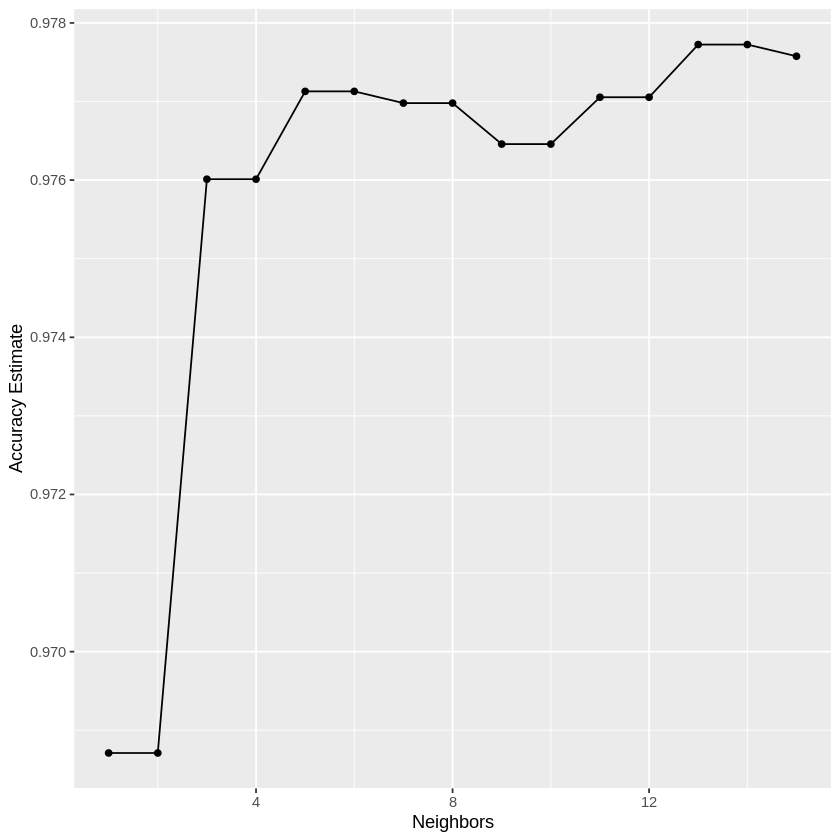

In [30]:
# Plot to help predict the no. of K to use
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_vs_k

Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [14]:
#number of observations in each class
training_count <- pulsar_train %>%
                group_by(class) %>%
                summarize (n = n())
training_count

`summarise()` ungrouping output (override with `.groups` argument)



class,n
<fct>,<int>
0,12178
1,1245
